In [65]:
import numpy as np
import pandas as pd
import h5py
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import geopandas as gpd
import matplotlib.dates as md
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

In [66]:
def simple_read(path):
    with open(path) as f:
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
        #all_lines = f.readlines()
    data = pd.read_csv(path, sep=',', skiprows=header_line)
    data.columns = [i.strip() for i in data.columns]
    #date = all_lines[5][0:10].split(',')
    #dt = datetime(int(date[0]), int(date[1]), int(date[2]))

    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
    #print(path[:acc+4], path[acc+4:acc+6], path[acc+6:acc+8])
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8]))
    
    for column in data.keys():
        if 'Time' in column:
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    return data.replace(-999999, np.NaN)

In [118]:
DAY22 = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220602_R0_L1_20230921T222712.ict')
start_index = np.where(DAY22["Time_Start"] == pd.to_datetime("2022-06-02 12:58:55"))
stop_index = np.where(DAY22["Time_Start"] == pd.to_datetime("2022-06-02 13:10:00"))

DAY22_subset = DAY22[start_index[0][0]:stop_index[0][0]]

# Fill NaN values in the 'fRH550_RH20to80_ZIEMBA' column with 0
DAY22_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY22_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)

# Print the modified subset dataframe
# Drop rows with NaN values
DAY22_subset = DAY22_subset.dropna()
DAY22_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
6497,2022-06-02 13:07:31,2022-06-02 13:07:32,32.886285,-69.398170,3778.82,0.0,2.190,0.850
6498,2022-06-02 13:07:32,2022-06-02 13:07:33,32.885385,-69.397090,3777.74,0.0,1.975,0.975
6499,2022-06-02 13:07:33,2022-06-02 13:07:34,32.884488,-69.396004,3776.73,0.0,1.785,1.100


In [117]:
DAY2 = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220602_R0_L1_20230921T222712.ict')
start_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 14:11:00"))
DAY2_subset = DAY2[start_index[0][0]:stop_index[0][0]]

# Fill NaN values in the 'fRH550_RH20to80_ZIEMBA' column with 0
DAY2_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY2_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)
DAY2_subset = DAY2_subset.dropna()
DAY2_subset



,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [119]:
DAY2b = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220602_R0_L2_20230921T222712.ict')
start_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:53:00"))
DAY2b_subset = DAY2b[start_index[0][0]:stop_index[0][0]]
DAY2b_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY2b_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)
DAY2b_subset = DAY2b_subset.dropna()
DAY2b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [120]:
DAY7 = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220607_R0_L1_20230921T222713.ict')
start_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
    
DAY7_subset =DAY7[start_index[0][0]:stop_index[0][0]]
DAY7_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY7_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)
DAY7_subset = DAY7_subset.dropna()
DAY7_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
11002,2022-06-07 14:42:05,2022-06-07 14:42:06,32.240977,-65.046832,1709.35,0.00,2.005,0.650
11003,2022-06-07 14:42:06,2022-06-07 14:42:07,32.241582,-65.045867,1711.97,0.00,2.020,0.715
11004,2022-06-07 14:42:07,2022-06-07 14:42:08,32.242165,-65.044882,1714.65,0.00,2.280,0.780
11012,2022-06-07 14:42:15,2022-06-07 14:42:16,32.246183,-65.036494,1734.40,0.00,2.240,0.950
11013,2022-06-07 14:42:16,2022-06-07 14:42:17,32.246606,-65.035393,1736.57,0.00,1.950,0.905
11014,2022-06-07 14:42:17,2022-06-07 14:42:18,32.247011,-65.034280,1738.74,0.00,1.695,0.745
11015,2022-06-07 14:42:18,2022-06-07 14:42:19,32.247397,-65.033157,1740.89,1.01,1.475,0.640
11016,2022-06-07 14:42:19,2022-06-07 14:42:20,32.247765,-65.032024,1743.03,1.01,1.330,0.650


In [123]:
DAY7b = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220607_R0_L2_20230921T222713.ict')
start_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
    
DAY7b_subset =DAY7b[start_index[0][0]:stop_index[0][0]]
DAY7b_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY7b_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)

DAY7b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [122]:
DAY8 = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220608_R0_L2_20230921T222714.ict')
start_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:45:00"))
    
DAY8_subset = DAY8[start_index[0][0]:stop_index[0][0]]
DAY8_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY8_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)
DAY8_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [124]:
DAY10 = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220610_R0_L1_20230921T222714.ict')
start_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:25:00"))
    
DAY10_subset = DAY10[start_index[0][0]:stop_index[0][0]]
DAY10_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY10_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)
DAY10_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [125]:
DAY10b = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220610_R0_L2_20230921T222714.ict')
start_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 19:51:00"))
    
DAY110b_subset = DAY10b[start_index[0][0]:stop_index[0][0]]
DAY110b_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY110b_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)
DAY110b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
8126,2022-06-10 19:45:44,2022-06-10 19:45:45,31.637785,-65.846138,4501.85,0.0,0.910,0.985
8127,2022-06-10 19:45:45,2022-06-10 19:45:46,31.636715,-65.846486,4512.82,0.0,0.825,1.020
8128,2022-06-10 19:45:46,2022-06-10 19:45:47,31.635646,-65.846836,4523.86,0.0,0.755,1.125
8129,2022-06-10 19:45:47,2022-06-10 19:45:48,31.634578,-65.847190,4534.95,0.0,0.625,1.275
8130,2022-06-10 19:45:48,2022-06-10 19:45:49,31.633512,-65.847546,4546.10,0.0,0.475,1.365
...,...,...,...,...,...,...,...,...
8437,2022-06-10 19:50:55,2022-06-10 19:50:56,31.228702,-65.973911,4967.45,0.0,0.515,1.120
8438,2022-06-10 19:50:56,2022-06-10 19:50:57,31.227365,-65.974288,4964.11,0.0,0.705,1.070
8439,2022-06-10 19:50:57,2022-06-10 19:50:58,31.226025,-65.974659,4960.81,0.0,0.885,1.155
8440,2022-06-10 19:50:58,2022-06-10 19:50:59,31.224682,-65.975025,4957.52,0.0,1.085,1.230


In [127]:
DAY10b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220610_R0_L2_20230918T232333.ict')
start_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 20:25:00"))
stop_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 20:35:00"))
    
DAY10b_subset = DAY10b[start_index[0][0]:stop_index[0][0]]
DAY10b_subset = DAY10b_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY10b_subset = DAY10b_subset.dropna()
DAY10b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [128]:
DAY11 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220611_R0_L1_20230918T232334.ict')
start_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:42:00"))
    
DAY11_subset = DAY11[start_index[0][0]:stop_index[0][0]]
DAY11_subset = DAY11_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY11_subset = DAY11_subset.dropna()
DAY11_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [129]:
DAY11b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220611_R0_L2_20230918T232334.ict')
start_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:08:00"))
stop_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:15:39"))
    
DAY11b_subset = DAY11b[start_index[0][0]:stop_index[0][0]]
DAY11b_subset = DAY11b_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY11b_subset = DAY11b_subset.dropna()
DAY11b_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [130]:
DAY13 = simple_read('C:/Users/taiwoajayi/Documents/AExponent/activate-mrg1_hu25_20220613_R0_L1_20230921T222716.ict')
start_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:46:00"))
    
DAY13_subset = DAY13[start_index[0][0]:stop_index[0][0]]
DAY13_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY13_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)
DAY13_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10901,2022-06-13 14:44:46,2022-06-13 14:44:47,32.261553,-65.063989,3828.94,0.00,0.550,1.060
10902,2022-06-13 14:44:47,2022-06-13 14:44:48,32.260624,-65.064730,3839.11,0.00,0.550,1.000
10904,2022-06-13 14:44:49,2022-06-13 14:44:50,32.258739,-65.066163,3859.09,0.00,1.310,0.910
10905,2022-06-13 14:44:50,2022-06-13 14:44:51,32.257782,-65.066853,3868.95,0.00,1.110,1.000
10906,2022-06-13 14:44:51,2022-06-13 14:44:52,32.256816,-65.067526,3878.74,0.00,0.730,1.085
10907,2022-06-13 14:44:52,2022-06-13 14:44:53,32.255840,-65.068183,3888.49,0.00,0.450,1.040
10908,2022-06-13 14:44:53,2022-06-13 14:44:54,32.254857,-65.068822,3898.20,0.00,0.245,0.930
10909,2022-06-13 14:44:54,2022-06-13 14:44:55,32.253866,-65.069445,3907.86,0.00,0.080,0.795
10910,2022-06-13 14:44:55,2022-06-13 14:44:56,32.252865,-65.070049,3917.45,0.00,-0.050,0.710
10911,2022-06-13 14:44:56,2022-06-13 14:44:57,32.251857,-65.070636,3926.98,0.00,-0.055,0.730


In [131]:
DAY13b = simple_read('C:/Users/taiwoajayi/Documents/AExponent/activate-mrg1_hu25_20220613_R0_L2_20230921T222716.ict')
start_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00")) 
DAY13b_subset = DAY13b[start_index[0][0]:stop_index[0][0]]
DAY13b_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY13b_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)
DAY13b_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
11820,2022-06-13 20:06:10,2022-06-13 20:06:11,32.232292,-64.995428,3227.65,0.0,1.075,1.390
11821,2022-06-13 20:06:11,2022-06-13 20:06:12,32.231460,-64.994421,3235.24,0.0,1.330,1.390
11824,2022-06-13 20:06:14,2022-06-13 20:06:15,32.229140,-64.991205,3261.76,0.0,1.710,1.690
11825,2022-06-13 20:06:15,2022-06-13 20:06:16,32.228424,-64.990077,3271.46,0.0,1.860,1.660
11826,2022-06-13 20:06:16,2022-06-13 20:06:17,32.227737,-64.988923,3281.48,0.0,2.110,1.715
...,...,...,...,...,...,...,...,...
11972,2022-06-13 20:08:42,2022-06-13 20:08:43,32.300477,-64.983970,4455.08,0.0,0.120,1.350
11973,2022-06-13 20:08:43,2022-06-13 20:08:44,32.299865,-64.985119,4462.41,0.0,0.115,1.405
11974,2022-06-13 20:08:44,2022-06-13 20:08:45,32.299221,-64.986243,4470.36,0.0,0.315,1.410
11975,2022-06-13 20:08:45,2022-06-13 20:08:46,32.298545,-64.987340,4478.69,0.0,0.600,1.335


In [132]:
DAY14 = simple_read('C:/Users/taiwoajayi/Documents/AExponent/activate-mrg1_hu25_20220614_R0_20230921T222716.ict')
start_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:25:00"))
DAY14_subset = DAY14[start_index[0][0]:stop_index[0][0]]
DAY14_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY14_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)
DAY14_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
9843,2022-06-14 16:13:00,2022-06-14 16:13:01,30.644900,-64.372136,3847.91,0.00,-1.040,0.935
9844,2022-06-14 16:13:01,2022-06-14 16:13:02,30.644294,-64.373248,3855.40,0.00,-0.900,1.060
9865,2022-06-14 16:13:22,2022-06-14 16:13:23,30.640215,-64.399909,4020.90,0.00,-0.005,0.270
9866,2022-06-14 16:13:23,2022-06-14 16:13:24,30.640466,-64.401196,4028.70,0.00,0.060,0.270
9874,2022-06-14 16:13:31,2022-06-14 16:13:32,30.644011,-64.410894,4089.30,0.00,0.025,0.950
...,...,...,...,...,...,...,...,...
10558,2022-06-14 16:24:55,2022-06-14 16:24:56,30.850057,-64.439182,8454.59,0.35,-0.390,0.995
10559,2022-06-14 16:24:56,2022-06-14 16:24:57,30.851471,-64.439393,8461.00,0.00,-0.485,1.365
10560,2022-06-14 16:24:57,2022-06-14 16:24:58,30.852885,-64.439595,8467.42,0.00,-0.605,1.735
10561,2022-06-14 16:24:58,2022-06-14 16:24:59,30.854300,-64.439786,8473.86,0.00,-0.705,1.850


In [133]:
DAY17 = simple_read('C:/Users/taiwoajayi/Documents/AExponent/activate-mrg1_hu25_20220617_R0_20230921T222716.ict')
start_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00")) 
DAY17_subset = DAY17[start_index[0][0]:stop_index[0][0]]
DAY17_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY17_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)
DAY17_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
11518,2022-06-17 16:37:29,2022-06-17 16:37:30,32.178931,-65.016075,3111.76,1.46,-0.070,1.030
11519,2022-06-17 16:37:30,2022-06-17 16:37:31,32.178736,-65.014702,3118.89,0.65,-0.120,1.025
11520,2022-06-17 16:37:31,2022-06-17 16:37:32,32.178582,-65.013323,3126.06,0.65,-0.110,1.030
11521,2022-06-17 16:37:32,2022-06-17 16:37:33,32.178467,-65.011939,3133.24,0.00,-0.080,1.110
11522,2022-06-17 16:37:33,2022-06-17 16:37:34,32.178393,-65.010554,3140.39,0.00,-0.035,1.180
...,...,...,...,...,...,...,...,...
11972,2022-06-17 16:45:03,2022-06-17 16:45:04,32.194806,-64.934055,6909.97,0.00,2.860,1.310
11973,2022-06-17 16:45:04,2022-06-17 16:45:05,32.196020,-64.934266,6916.77,0.00,3.055,1.330
11974,2022-06-17 16:45:05,2022-06-17 16:45:06,32.197226,-64.934522,6923.57,0.00,3.300,1.355
11975,2022-06-17 16:45:06,2022-06-17 16:45:07,32.198422,-64.934825,6930.39,0.00,3.745,1.350


In [134]:

# Concatenate the dataframes vertically (along rows)
Africa_total = pd.concat([DAY13_subset, DAY13b_subset, DAY14_subset ], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Africa_total.reset_index(drop=True, inplace=True)
Africa_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
0,2022-06-13 14:44:46,2022-06-13 14:44:47,32.261553,-65.063989,3828.94,0.00,0.550,1.060
1,2022-06-13 14:44:47,2022-06-13 14:44:48,32.260624,-65.064730,3839.11,0.00,0.550,1.000
2,2022-06-13 14:44:49,2022-06-13 14:44:50,32.258739,-65.066163,3859.09,0.00,1.310,0.910
3,2022-06-13 14:44:50,2022-06-13 14:44:51,32.257782,-65.066853,3868.95,0.00,1.110,1.000
4,2022-06-13 14:44:51,2022-06-13 14:44:52,32.256816,-65.067526,3878.74,0.00,0.730,1.085
...,...,...,...,...,...,...,...,...
489,2022-06-14 16:24:55,2022-06-14 16:24:56,30.850057,-64.439182,8454.59,0.35,-0.390,0.995
490,2022-06-14 16:24:56,2022-06-14 16:24:57,30.851471,-64.439393,8461.00,0.00,-0.485,1.365
491,2022-06-14 16:24:57,2022-06-14 16:24:58,30.852885,-64.439595,8467.42,0.00,-0.605,1.735
492,2022-06-14 16:24:58,2022-06-14 16:24:59,30.854300,-64.439786,8473.86,0.00,-0.705,1.850


In [135]:
# Concatenate the dataframes vertically (along rows)
Ocean_total = pd.concat([DAY2_subset, DAY22_subset, DAY2b_subset], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Ocean_total.reset_index(drop=True, inplace=True)
Ocean_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
0,2022-06-02 13:07:31,2022-06-02 13:07:32,32.886285,-69.398170,3778.82,0.0,2.190,0.850
1,2022-06-02 13:07:32,2022-06-02 13:07:33,32.885385,-69.397090,3777.74,0.0,1.975,0.975
2,2022-06-02 13:07:33,2022-06-02 13:07:34,32.884488,-69.396004,3776.73,0.0,1.785,1.100


In [136]:
# Concatenate the dataframes vertically (along rows)
Caribbean_total = pd.concat([DAY10_subset, DAY10b_subset, DAY11_subset, DAY11b_subset, DAY13_subset, DAY13b_subset], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Caribbean_total.reset_index(drop=True, inplace=True)
Caribbean_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
0,2022-06-13 14:44:46,2022-06-13 14:44:47,32.261553,-65.063989,3828.94,0.0,0.550,1.060
1,2022-06-13 14:44:47,2022-06-13 14:44:48,32.260624,-65.064730,3839.11,0.0,0.550,1.000
2,2022-06-13 14:44:49,2022-06-13 14:44:50,32.258739,-65.066163,3859.09,0.0,1.310,0.910
3,2022-06-13 14:44:50,2022-06-13 14:44:51,32.257782,-65.066853,3868.95,0.0,1.110,1.000
4,2022-06-13 14:44:51,2022-06-13 14:44:52,32.256816,-65.067526,3878.74,0.0,0.730,1.085
...,...,...,...,...,...,...,...,...
150,2022-06-13 20:08:42,2022-06-13 20:08:43,32.300477,-64.983970,4455.08,0.0,0.120,1.350
151,2022-06-13 20:08:43,2022-06-13 20:08:44,32.299865,-64.985119,4462.41,0.0,0.115,1.405
152,2022-06-13 20:08:44,2022-06-13 20:08:45,32.299221,-64.986243,4470.36,0.0,0.315,1.410
153,2022-06-13 20:08:45,2022-06-13 20:08:46,32.298545,-64.987340,4478.69,0.0,0.600,1.335


In [137]:
# Concatenate the dataframes vertically (along rows)
North_America_total = pd.concat([DAY7_subset, DAY7b_subset, DAY8_subset, DAY17_subset], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
North_America_total.reset_index(drop=True, inplace=True)
North_America_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
0,2022-06-07 14:42:05,2022-06-07 14:42:06,32.240977,-65.046832,1709.35,0.0,2.005,0.650
1,2022-06-07 14:42:06,2022-06-07 14:42:07,32.241582,-65.045867,1711.97,0.0,2.020,0.715
2,2022-06-07 14:42:07,2022-06-07 14:42:08,32.242165,-65.044882,1714.65,0.0,2.280,0.780
3,2022-06-07 14:42:15,2022-06-07 14:42:16,32.246183,-65.036494,1734.40,0.0,2.240,0.950
4,2022-06-07 14:42:16,2022-06-07 14:42:17,32.246606,-65.035393,1736.57,0.0,1.950,0.905
...,...,...,...,...,...,...,...,...
273,2022-06-17 16:45:03,2022-06-17 16:45:04,32.194806,-64.934055,6909.97,0.0,2.860,1.310
274,2022-06-17 16:45:04,2022-06-17 16:45:05,32.196020,-64.934266,6916.77,0.0,3.055,1.330
275,2022-06-17 16:45:05,2022-06-17 16:45:06,32.197226,-64.934522,6923.57,0.0,3.300,1.355
276,2022-06-17 16:45:06,2022-06-17 16:45:07,32.198422,-64.934825,6930.39,0.0,3.745,1.350


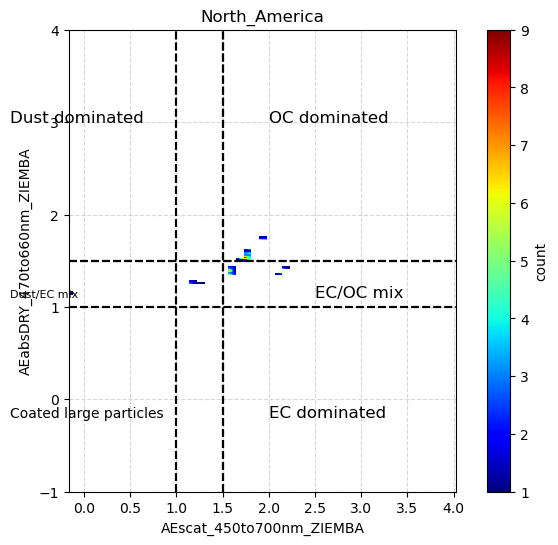

In [138]:

# Data
x = North_America_total['AEscat_450to700nm_ZIEMBA']
y = North_America_total['AEabsDRY_470to660nm_ZIEMBA']

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('North_America')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.axvline(1.5, color='k', linestyle='--')  # Separating line for EC
plt.axhline(1, color='k', linestyle='--')   # Separating line for Absorption - EC
plt.axvline(1.5, color='k', linestyle='--')    # Separating line for OC
plt.axhline(1.5, color='k', linestyle='--')   # Separating line for Absorption - OC
plt.axvline(1.5, color='k', linestyle='--')  # Separating line for EC/OC  mix
plt.axhline(1, color='k', linestyle='--')   # Separating line for Absorption - EC/OC
plt.axvline(1, color='k', linestyle='--') # Separating line for dust/EC  mix
plt.axhline(1.5, color='k', linestyle='--')   # Separating line for Absorption dust/EC  mix
plt.axvline(1, color='k', linestyle='--') # Separating line for dust  mix
plt.axhline(1.5, color='k', linestyle='--')   # Separating line for Absorption - Dust

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.show()


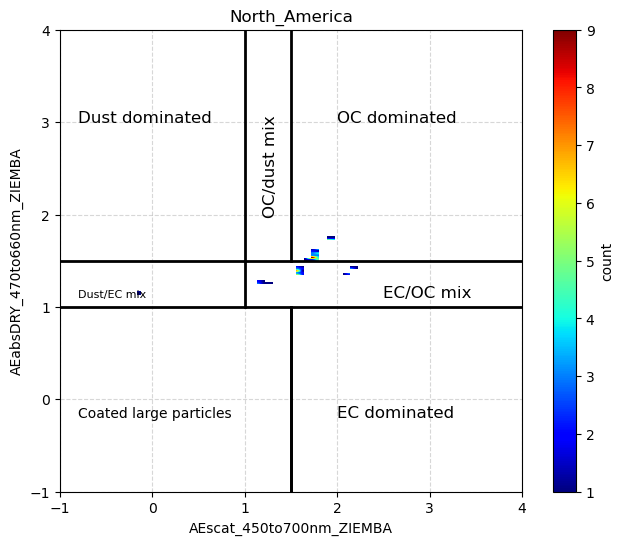

In [139]:
# Your data and histogram code...

# Data
x = North_America_total['AEscat_450to700nm_ZIEMBA']
y = North_America_total['AEabsDRY_470to660nm_ZIEMBA']
# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('North_America')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
plt.plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
plt.plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 

# Add category lines and labels
plt.plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
plt.plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated

# Add category lines and labels
plt.plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
plt.plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 



# Add other category lines...
# ...

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()


In [91]:

# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Africa_total': {
        'x': Africa_total['AEscat_450to700nm_ZIEMBA'],
        'y': Africa_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Africa'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    }
}


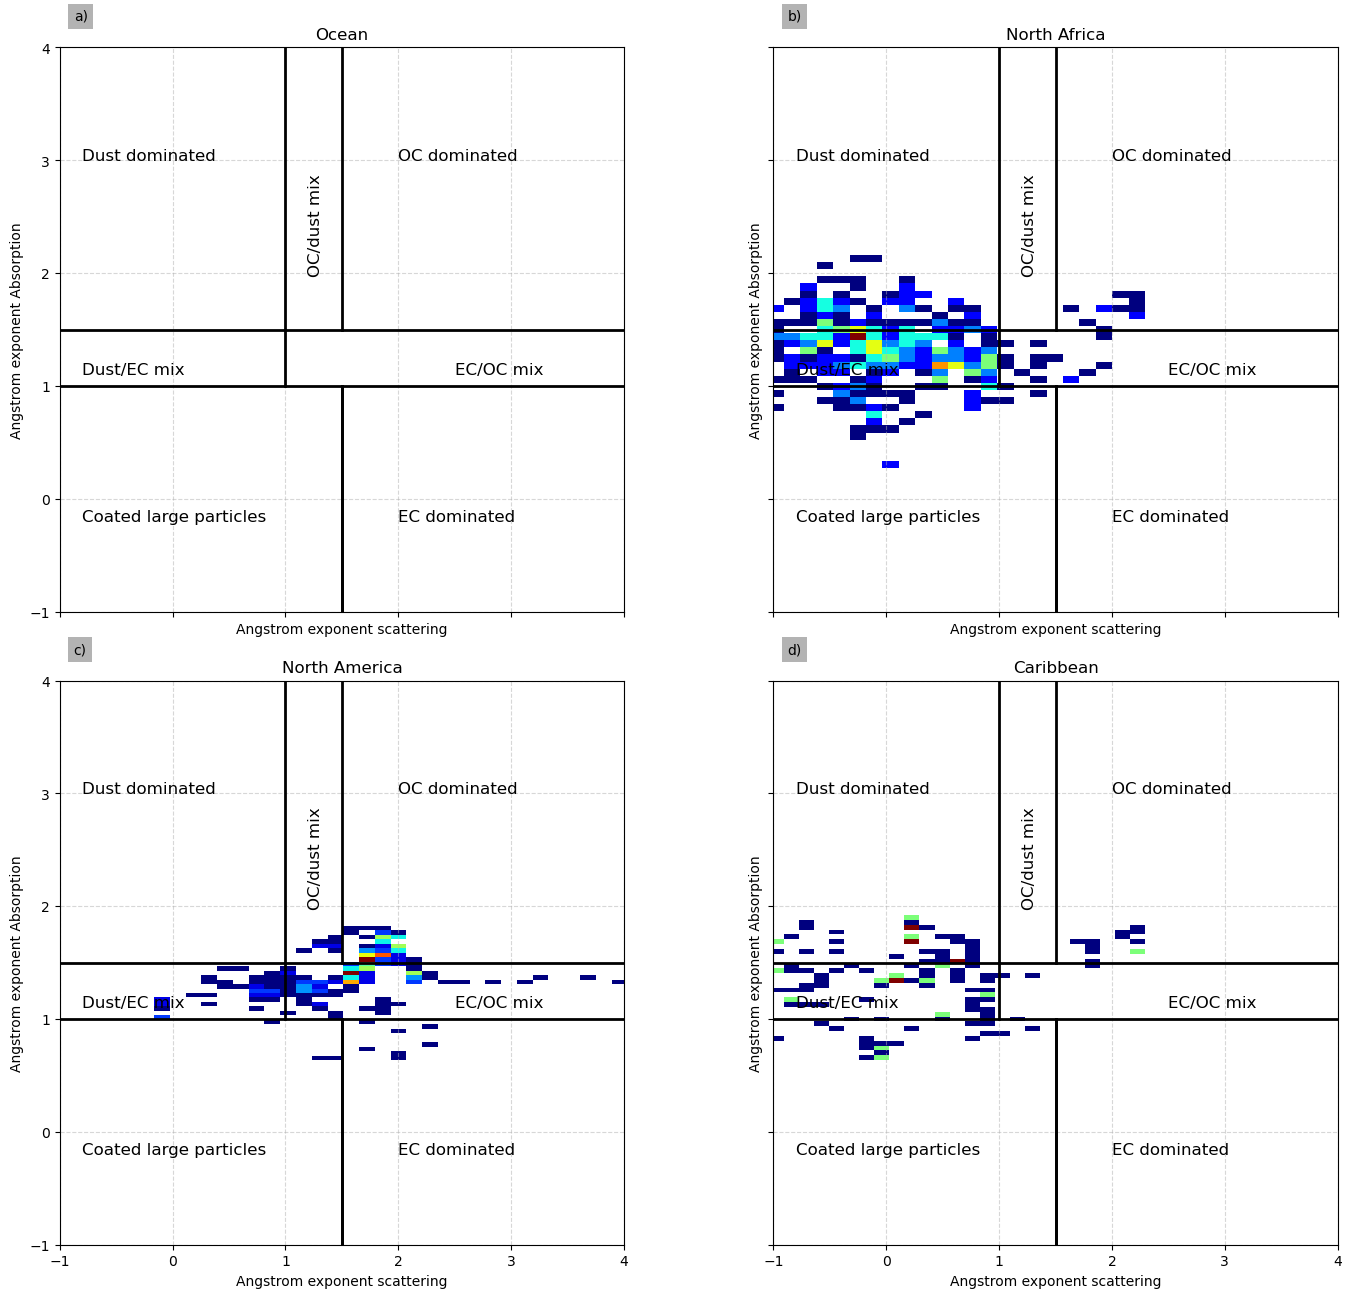

In [141]:
from matplotlib.transforms import ScaledTranslation

# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Africa_total': {
        'x': Africa_total['AEscat_450to700nm_ZIEMBA'],
        'y': Africa_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North Africa'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    }
}

# Create a 2x2 subplot grid
fig, ax = plt.subplots(2, 2, figsize=(15, 13), sharey='row', sharex='all')

# Loop through the data and create subplots
for i, (key, values) in enumerate(data.items()):
    x = values['x']
    y = values['y']
    title = values['title']

    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=30)
    hist = np.where(hist == 0, np.nan, hist)
    #hist = hist[~np.isnan(hist)]
    # Plot the histogram inside the corresponding subplot
    ax[i // 2, i % 2].imshow(
        hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet'
    )

    # Set subplot labels and title
    ax[i // 2, i % 2].set_xlabel('Angstrom exponent scattering')
    ax[i // 2, i % 2].set_ylabel('Angstrom exponent Absorption')
    ax[i // 2, i % 2].set_title(title)
    ax[i // 2, i % 2].grid(True, linestyle='--', alpha=0.5)

# Define labels 'a)', 'b)', 'c)', 'd)'
labels = ['a)', 'b)', 'c)', 'd)']

# Add labels 'a)', 'b)', 'c)', 'd)' and other elements
for i in range(4):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax[i // 2, i % 2].text(
        0.0, 1.08, labels[i],
        transform=ax[i // 2, i % 2].transAxes + trans,
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=4.0)
    )

# Add category lines and labels (adjust these as needed)
for i in range(2):
    for j in range(2):
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
        ax[i, j].plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
        ax[i, j].plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 
        ax[i, j].plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
        ax[i, j].plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated
        ax[i, j].plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
        ax[i, j].plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 

        ax[i, j].text(2, -0.2, 'EC dominated', fontsize=12, color='k')
        ax[i, j].text(2, 3, 'OC dominated', fontsize=12, color='k')
        ax[i, j].text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
        ax[i, j].text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
        ax[i, j].text(-0.8, -0.2, 'Coated large particles', fontsize=12, color='k')
        ax[i, j].text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
        ax[i, j].text(-0.8, 1.1, 'Dust/EC mix', fontsize=12, color='k')
# Set common axis limits for all subplots
for i in range(2):
    ax[i, 0].set_ylim(-1, 4)
    ax[i, 0].set_xlim(-1, 4)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


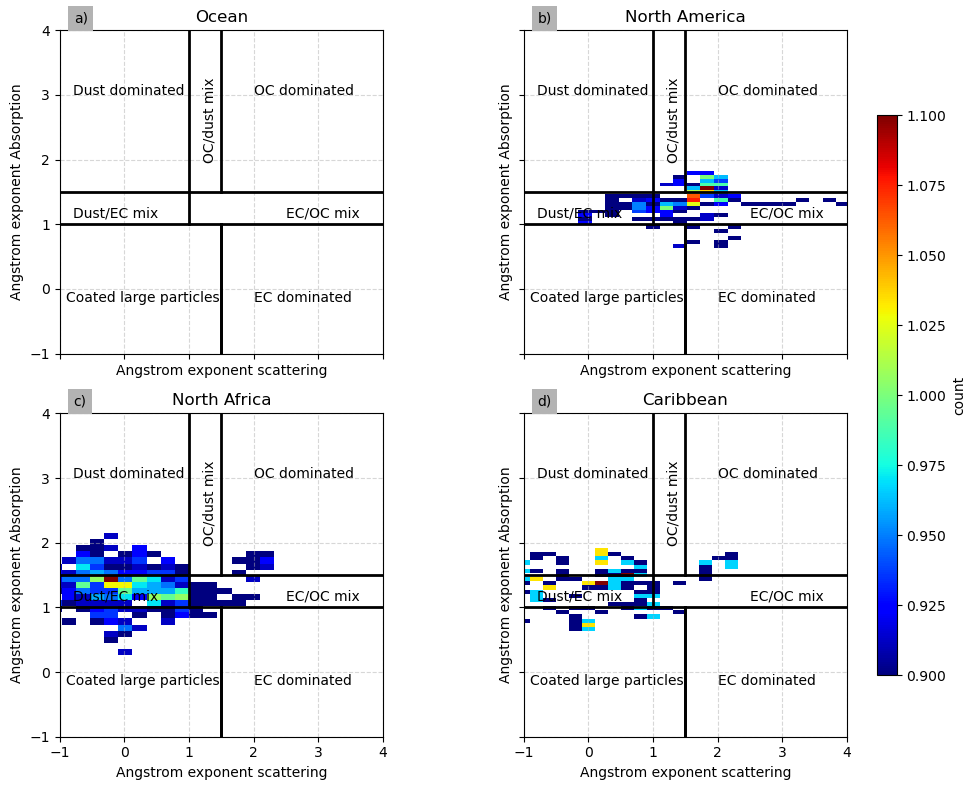

In [149]:
# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    },
    'Africa_total': {
        'x': Africa_total['AEscat_450to700nm_ZIEMBA'],
        'y': Africa_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North Africa'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    }
}

# Create a 2x2 subplot grid
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharey='row', sharex='all')

# Initialize a list to store the histogram images
hist_images = []

# Loop through the data and create subplots
for i, (key, values) in enumerate(data.items()):
    x = values['x']
    y = values['y']
    title = values['title']

    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=20)
    hist = np.where(hist == 0, np.nan, hist)
    #hist = hist[~np.isnan(hist)]

    # Plot the histogram inside the corresponding subplot
    im = ax[i // 2, i % 2].imshow(
        hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet'
    )
    
    # Store the histogram image in the list
    hist_images.append(im)

    # Set subplot labels and title
    ax[i // 2, i % 2].set_xlabel('Angstrom exponent scattering')
    ax[i // 2, i % 2].set_ylabel('Angstrom exponent Absorption')
    ax[i // 2, i % 2].set_title(title)
    ax[i // 2, i % 2].grid(True, linestyle='--', alpha=0.5)

# Define labels 'a)', 'b)', 'c)', 'd)'
labels = ['a)', 'b)', 'c)', 'd)']

# Add labels 'a)', 'b)', 'c)', 'd)' and other elements
for i in range(4):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax[i // 2, i % 2].text(
        0.0, 1.08, labels[i],
        transform=ax[i // 2, i % 2].transAxes + trans,
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=4.0)
    )

# Add category lines and labels (adjust these as needed)
for i in range(2):
    for j in range(2):
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
        ax[i, j].plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
        ax[i, j].plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 
        ax[i, j].plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
        ax[i, j].plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated
        ax[i, j].plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
        ax[i, j].plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 

        ax[i, j].text(2, -0.2, 'EC dominated', fontsize=10, color='k')
        ax[i, j].text(2, 3, 'OC dominated', fontsize=10, color='k')
        ax[i, j].text(1.2, 2, 'OC/dust mix', fontsize=10, color='k', rotation='vertical')
        ax[i, j].text(-0.8, 3, 'Dust dominated', fontsize=10, color='k')
        ax[i, j].text(-0.9, -0.2, 'Coated large particles', fontsize=10, color='k')
        ax[i, j].text(2.5, 1.1, 'EC/OC mix', fontsize=10, color='k')
        ax[i, j].text(-0.8, 1.1, 'Dust/EC mix', fontsize=10, color='k')

# Create a single color bar for all subplots
cax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
cbar = plt.colorbar(hist_images[0], cax=cax)
cbar.set_label('count')

for i in range(2):
    ax[i, 0].set_ylim(-1, 4)
    ax[i, 0].set_xlim(-1, 4)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [143]:
# Apply the conditions to filter the data
coated_North_America_total = North_America_total[
    (North_America_total['AEscat_450to700nm_ZIEMBA'] <= 1.499) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] <= 0.999)
]

coated_North_America_total
EC_North_America_total = North_America_total[
    (North_America_total['AEscat_450to700nm_ZIEMBA'] >= 1.5) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] <= 0.999)
]

EC_North_America_total

Dust_North_America_total = North_America_total[
    (North_America_total['AEscat_450to700nm_ZIEMBA'] <= 0.999) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1.5)
]

Dust_North_America_total

Dust_EC_North_America_total = North_America_total[
    ((North_America_total['AEscat_450to700nm_ZIEMBA'] <=0.999) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1)  & (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] <= 1.5))
]

Dust_EC_North_America_total

EC_OC_North_America_total = North_America_total[
    ((North_America_total['AEscat_450to700nm_ZIEMBA'] >=1.5) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1)  & (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] <= 1.499))
]

EC_OC_North_America_total

OC_North_America_total = North_America_total[
    (North_America_total['AEscat_450to700nm_ZIEMBA'] >=1.5) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1.5)
]

OC_North_America_total

OC_dust_North_America_total = North_America_total[
    ((North_America_total['AEscat_450to700nm_ZIEMBA'] >=1)  & (North_America_total['AEscat_450to700nm_ZIEMBA'] <= 1.499)) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1.5)
]

OC_dust_North_America_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
85,2022-06-17 16:41:55,2022-06-17 16:41:56,32.226591,-64.955108,5388.54,0.0,1.480,1.625
86,2022-06-17 16:41:56,2022-06-17 16:41:57,32.227509,-64.956116,5397.44,0.0,1.470,1.610
87,2022-06-17 16:41:57,2022-06-17 16:41:58,32.228400,-64.957157,5406.42,0.0,1.440,1.650
88,2022-06-17 16:41:58,2022-06-17 16:41:59,32.229262,-64.958233,5415.43,0.0,1.360,1.670
89,2022-06-17 16:41:59,2022-06-17 16:42:00,32.230093,-64.959339,5424.48,0.0,1.265,1.640
90,2022-06-17 16:42:00,2022-06-17 16:42:01,32.230894,-64.960477,5433.58,0.0,1.230,1.615
91,2022-06-17 16:42:01,2022-06-17 16:42:02,32.231665,-64.961644,5442.75,0.0,1.305,1.635
92,2022-06-17 16:42:02,2022-06-17 16:42:03,32.232402,-64.962840,5451.97,0.0,1.400,1.680
93,2022-06-17 16:42:03,2022-06-17 16:42:04,32.233107,-64.964063,5461.20,0.0,1.475,1.715


In [144]:
Dust_EC_North_America_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
8,2022-06-17 16:37:29,2022-06-17 16:37:30,32.178931,-65.016075,3111.76,1.46,-0.070,1.030
9,2022-06-17 16:37:30,2022-06-17 16:37:31,32.178736,-65.014702,3118.89,0.65,-0.120,1.025
10,2022-06-17 16:37:31,2022-06-17 16:37:32,32.178582,-65.013323,3126.06,0.65,-0.110,1.030
11,2022-06-17 16:37:32,2022-06-17 16:37:33,32.178467,-65.011939,3133.24,0.00,-0.080,1.110
12,2022-06-17 16:37:33,2022-06-17 16:37:34,32.178393,-65.010554,3140.39,0.00,-0.035,1.180
18,2022-06-17 16:37:43,2022-06-17 16:37:44,32.179800,-64.996914,3210.14,0.00,0.980,1.200
19,2022-06-17 16:37:44,2022-06-17 16:37:45,32.180156,-64.995610,3217.78,1.46,0.845,1.300
20,2022-06-17 16:37:45,2022-06-17 16:37:46,32.180550,-64.994324,3225.66,1.46,0.785,1.305
21,2022-06-17 16:37:46,2022-06-17 16:37:47,32.180982,-64.993057,3233.72,0.00,0.825,1.235
22,2022-06-17 16:37:47,2022-06-17 16:37:48,32.181451,-64.991812,3241.88,0.00,0.960,1.270


In [145]:
OC_North_America_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
94,2022-06-17 16:42:04,2022-06-17 16:42:05,32.233778,-64.965313,5470.48,0.000,1.570,1.770
95,2022-06-17 16:42:05,2022-06-17 16:42:06,32.234415,-64.966588,5479.80,0.000,1.650,1.820
96,2022-06-17 16:42:06,2022-06-17 16:42:07,32.235017,-64.967885,5489.14,0.000,1.695,1.795
97,2022-06-17 16:42:07,2022-06-17 16:42:08,32.235585,-64.969205,5498.45,0.000,1.750,1.735
98,2022-06-17 16:42:08,2022-06-17 16:42:09,32.236118,-64.970545,5507.73,0.000,1.820,1.710
...,...,...,...,...,...,...,...,...
249,2022-06-17 16:44:39,2022-06-17 16:44:40,32.166336,-64.942723,6738.74,0.905,2.025,1.505
250,2022-06-17 16:44:40,2022-06-17 16:44:41,32.167385,-64.941859,6745.83,0.975,2.045,1.505
251,2022-06-17 16:44:41,2022-06-17 16:44:42,32.168455,-64.941035,6752.91,1.015,2.065,1.510
252,2022-06-17 16:44:42,2022-06-17 16:44:43,32.169545,-64.940254,6760.01,1.000,2.075,1.520


In [146]:
EC_OC_North_America_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
33,2022-06-17 16:37:58,2022-06-17 16:37:59,32.188772,-64.979859,3329.60,0.0,1.695,1.075
34,2022-06-17 16:37:59,2022-06-17 16:38:00,32.189611,-64.978960,3337.11,0.0,1.795,1.135
35,2022-06-17 16:38:00,2022-06-17 16:38:01,32.190475,-64.978097,3344.60,0.0,1.830,1.155
36,2022-06-17 16:38:01,2022-06-17 16:38:02,32.191365,-64.977272,3352.05,0.0,1.995,1.115
37,2022-06-17 16:38:02,2022-06-17 16:38:03,32.192278,-64.976487,3359.45,0.0,1.930,1.090
...,...,...,...,...,...,...,...,...
273,2022-06-17 16:45:03,2022-06-17 16:45:04,32.194806,-64.934055,6909.97,0.0,2.860,1.310
274,2022-06-17 16:45:04,2022-06-17 16:45:05,32.196020,-64.934266,6916.77,0.0,3.055,1.330
275,2022-06-17 16:45:05,2022-06-17 16:45:06,32.197226,-64.934522,6923.57,0.0,3.300,1.355
276,2022-06-17 16:45:06,2022-06-17 16:45:07,32.198422,-64.934825,6930.39,0.0,3.745,1.350


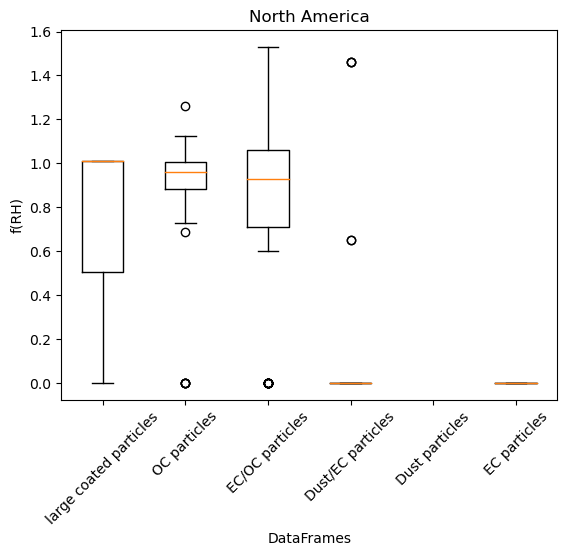

In [148]:

# Assuming you have a list of DataFrames with corresponding labels
dataframes_with_labels = [(coated_North_America_total, 'large coated particles'),
    (OC_North_America_total, 'OC particles'),
    (EC_OC_North_America_total, 'EC/OC particles'),
    (Dust_EC_North_America_total, 'Dust/EC particles'),
    (Dust_North_America_total, 'Dust particles'),
    (EC_North_America_total, 'EC particles')
]

# Create a figure and axis
fig, ax = plt.subplots()

# Create an empty list to store the data for plotting
data_to_plot = []

# Create a list to store the labels
labels = []

# Extract and store the 'fRH550_RH20to80_ZIEMBA' column from each DataFrame and labels
for df, label in dataframes_with_labels:
    data_to_plot.append(df['fRH550_RH20to80_ZIEMBA'].tolist())
    labels.append(label)

# Create the box and whisker plot
ax.boxplot(data_to_plot, labels=labels)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Set labels and title
ax.set_xlabel('DataFrames')
ax.set_ylabel('f(RH)')
ax.set_title('North America')

# Show the plot
plt.show()
